<a href="https://colab.research.google.com/github/Sudharsan0001/Credit_Card_Fraud/blob/main/Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

In the realm of financial transactions, credit card fraud remains a persistent and challenging issue, posing significant risks to both financial institutions and cardholders. This project delves into the analysis of credit card transactions with the goal of developing effective models for fraud detection.

The dataset used in this analysis consists of credit card transactions, with each transaction labeled as either legitimate (0) or fraudulent (1). The dataset includes various features such as transaction amount, time, and anonymized numerical features derived from credit card details.

We will employ feature selection techniques, such as Recursive Feature Elimination (RFE) and RFECV, to identify the most relevant features for fraud detection.

We will then build and train machine learning models, including Random Forest, XGBoost, and SVM, to predict fraudulent transactions.





In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing & Exploration

In [2]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [43]:
from sklearn.feature_selection import RFECV, RFE

In [3]:
import io
cdf = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))

In [4]:
cdf = pd.read_csv('creditcard.csv')

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
cdf.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
74525,55624.0,0.967079,-0.806577,0.989194,0.361487,-1.389785,-0.365721,-0.530668,0.058808,1.295157,-0.490362,-0.907917,0.215801,-0.692845,-0.389394,-0.212300,-0.072300,0.188816,-0.530091,0.429236,0.134352,-0.165226,-0.534329,-0.022822,0.447252,0.066214,0.931554,-0.061962,0.034777,134.60,0
118182,74980.0,1.143282,0.491330,1.130735,2.680605,-0.366629,-0.102423,-0.067095,-0.021112,-0.367712,0.475443,-0.692539,0.762163,0.970152,-0.369581,-0.671912,0.331222,-0.337853,-0.820776,-0.585786,-0.100455,-0.349282,-0.862360,0.140733,0.360631,0.285760,-0.277904,0.023388,0.033429,5.30,0
265286,161818.0,-0.596465,1.213661,-2.105607,-1.645982,2.854464,3.159766,0.193347,1.144500,0.200483,-0.199689,0.126366,-0.069104,-0.394883,-0.784573,0.179869,0.216813,0.398801,-0.398299,-0.460295,0.253311,-0.408587,-0.938219,0.128752,0.586735,-0.328090,0.147423,0.182316,-0.109925,8.99,0
45502,42377.0,1.098900,-0.164547,0.580137,0.816514,-0.732243,-0.522312,-0.139183,0.046201,0.345810,-0.011943,1.039794,0.671689,-1.206651,0.358518,-0.806302,-0.091782,-0.082389,-0.148364,0.425444,-0.104636,-0.155468,-0.441217,0.003891,0.540576,0.346449,0.238657,-0.040041,0.009221,45.60,0
223143,143261.0,-9.424368,8.330671,-5.407400,-3.142765,-1.520152,-2.218036,0.499161,1.108062,6.394305,11.033981,1.292300,0.677349,-1.219791,-1.087150,-0.262576,-1.154287,-0.648376,-0.343586,-0.943051,4.389705,-0.935104,0.408680,0.233656,-0.052265,1.320611,-0.070776,1.233623,-0.588359,0.68,0
96298,65706.0,-1.580224,0.770894,1.284519,1.556645,-0.555662,0.640851,-0.712167,1.193143,-0.435038,-0.632280,0.542721,1.545683,0.280120,0.312341,-1.175617,-0.880360,0.869626,-0.065967,1.161994,-0.161655,0.187796,0.545284,-0.077023,0.066327,-0.087626,-0.198704,-0.135849,-0.110216,6.00,0
177226,123092.0,-0.184688,1.007961,1.713576,4.411753,1.445593,1.344868,0.639713,-0.348741,-1.289354,1.762093,-2.116036,-0.314939,1.533030,-1.015912,-0.667400,-0.698315,-0.046899,0.137839,1.913359,0.438018,0.032105,0.757619,-0.491845,-0.919625,0.033668,0.581167,-0.289227,-0.242014,0.00,0
154671,102505.0,-2.841177,3.480960,-1.596446,-1.260163,0.361324,-1.159671,0.259493,-4.451404,2.454026,1.631662,0.643996,-1.880132,1.574923,1.750160,-0.929135,-1.013838,0.771900,-0.424548,-0.862161,-0.022926,3.746102,-0.580411,0.493014,0.302172,0.073089,0.088831,1.279253,0.739997,9.25,0
193295,130076.0,-1.239287,1.324435,-0.249134,-0.349894,1.444575,-0.440204,2.561123,-0.400318,-0.991451,-1.743591,-0.740022,-0.015528,0.450945,-1.414906,-1.330169,0.224221,0.430057,-0.004807,-1.566752,-0.126394,-0.030590,-0.065873,-0.509980,0.497383,1.511643,-0.585622,-0.086193,0.059605,176.90,0
6305,7445.0,-4.978647,0.336814,0.746039,-1.084797,0.325907,1.628408,0.645811,-1.282529,5.170348,2.317371,2.030852,-1.631496,2.374698,-0.878103,1.686000,-3.070139,1.475653,-1.785204,-0.067768,-0.906311,-0.194414,1.553438,-0.656836,-0.888276,-0.768344,-1.054210,-5.775943,-2.283114,1.00,0


In [7]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
cdf.shape

(284807, 31)

In [9]:
cdf.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

*  We have 284807 rows & 31 columns in my dataframe.
*  The datatype of all the columns is float except class which is int.






In [10]:
cdf.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Amount has high standard deviation which indicates variability in the data. The 75th percentile value is 77.1 but the max value is 25691.1 which indicates the presence of outliers.

In [11]:
cdf['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

0 indicates legitimate transactions. 1 indicates fraudulent transactions.

In [12]:
legit_df = cdf[cdf['Class'] == 0]
fraud_df = cdf[cdf['Class'] == 1]

In [13]:
legit_df.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud_df.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Due to Class imbalance we will undersample our legitimate transactions data.

In [15]:
legit_df = legit_df.sample(n=492)
new_cdf = pd.concat([legit_df, fraud_df], axis=0)
new_cdf.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42590,41164.0,-5.932778,4.571743,-9.427247,6.577056,-6.115218,-3.661798,-10.894079,3.709210,-5.859524,-12.981619,8.265295,-14.154165,0.479843,-16.337596,1.646045,-12.375397,-21.090613,-7.724546,3.856375,1.191078,2.014272,-0.167417,0.049968,0.384430,-0.077884,0.565493,1.792012,0.371007,5.30,1
33276,37167.0,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,-0.794994,3.266066,-2.719185,-0.124104,-5.274866,0.638575,-2.995830,-4.698433,-1.711871,3.025261,-2.169811,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,12.31,1
191752,129400.0,1.953618,-0.999585,-0.849218,0.534643,-0.332574,0.998626,-0.853930,0.334456,0.108597,0.966521,-0.823841,0.103132,-1.157850,-0.006982,-1.759288,-1.437537,-0.254285,1.365760,0.004590,-0.604663,-0.873371,-2.006002,0.406304,-0.371647,-0.403983,-1.098891,0.054348,-0.030895,65.68,0
57948,48155.0,1.018995,-0.488520,0.334326,0.521139,-0.213852,0.758999,-0.344386,0.123244,0.425740,-0.136512,-0.039787,1.396018,1.610912,-0.467404,-0.668097,0.528217,-0.935793,0.611362,0.689841,0.286832,0.112725,0.318630,-0.408963,-0.916830,0.646116,0.559441,-0.014562,0.019179,129.90,0
214224,139583.0,-1.162069,-0.039179,2.092758,-0.876000,0.647031,0.096645,0.956064,-0.357169,0.240225,-0.541888,0.856794,0.844199,0.874532,-0.546953,0.217806,0.144608,-1.248258,0.901750,0.113278,0.121477,0.167863,0.949187,-0.264081,-0.367765,0.789891,-0.478824,-0.316955,-0.397482,79.00,0
96789,65936.0,-3.593476,0.781442,-1.822448,0.605761,-1.194656,-0.517195,-1.722523,0.128890,0.014963,-2.856117,1.618262,-3.581375,0.623707,-6.160457,0.494733,-2.543105,-5.301273,-2.192713,-0.094724,-0.478219,0.351792,0.391249,-0.252875,-0.498042,0.010172,0.909929,-1.478767,0.722673,101.50,1
26927,34312.0,-0.546308,0.991741,1.884456,-0.212090,0.185500,-0.636890,1.045384,-0.395613,-0.268398,0.570438,1.783688,0.837023,0.427633,-0.248937,0.149509,0.125074,-0.819267,-0.062449,0.200519,0.413837,-0.289378,-0.369048,-0.066825,0.528482,-0.229228,-0.012686,0.044774,-0.265502,11.99,0
281305,170083.0,-0.521380,0.637118,0.129607,-1.023434,0.801208,0.418955,-0.070805,-1.766180,1.185576,-0.319416,0.653408,-0.171575,-1.281810,-1.451298,-0.107264,0.812268,-0.119747,1.095627,0.035361,-0.517272,1.285227,-0.834556,0.487132,0.022792,-1.223187,-0.516917,-0.331344,-0.268329,2.31,0
223578,143438.0,-5.256434,0.364541,-5.412085,2.400031,0.697301,-1.998755,-5.835532,-0.887739,-2.828287,-4.614508,2.710697,-3.158156,1.083609,-3.415152,-1.053870,-3.751031,-9.261641,-2.955165,0.606571,-0.403685,-0.648259,0.511285,-1.110045,0.178987,0.220235,-0.699809,0.580487,-0.173630,8.90,1
241254,150949.0,-2.423535,1.659093,-3.071421,2.588033,1.135791,-1.892388,-2.588418,-2.226592,-1.670173,-3.508925,1.439322,-1.959927,0.767485,-4.978118,1.058566,-0.997477,-0.817261,0.307798,0.028485,0.353898,-0.934127,0.922038,-0.180255,-0.281719,0.299285,-0.263801,0.150156,0.292112,9.29,1


In [16]:
new_cdf['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

The issue of class imbalance has now been addressed.

In [17]:
new_cdf.shape

(984, 31)

# Model Selection & Evaluation

In [18]:
X = new_cdf.drop(columns='Class', axis=1)
y = new_cdf['Class']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
X_train.shape

(787, 30)

In [21]:
X_test.shape

(197, 30)

In [22]:
RF_model = RandomForestClassifier(random_state=1)

In [23]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('RF_model', RF_model)
    ])

scores = cross_val_score(pipeline, X_train, y_train, cv=5)

mean_accuracy = scores.mean()

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Model:", RandomForestClassifier())
print("Cross-validation Accuracy:", mean_accuracy)
print("Test Accuracy:", accuracy)
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

Model: RandomForestClassifier()
Cross-validation Accuracy: 0.9478916391195679
Test Accuracy: 0.934010152284264
Recall Score:  0.8823529411764706
Precision Score:  0.989010989010989
F1 Score:  0.9326424870466321


In [24]:
best_model = pipeline

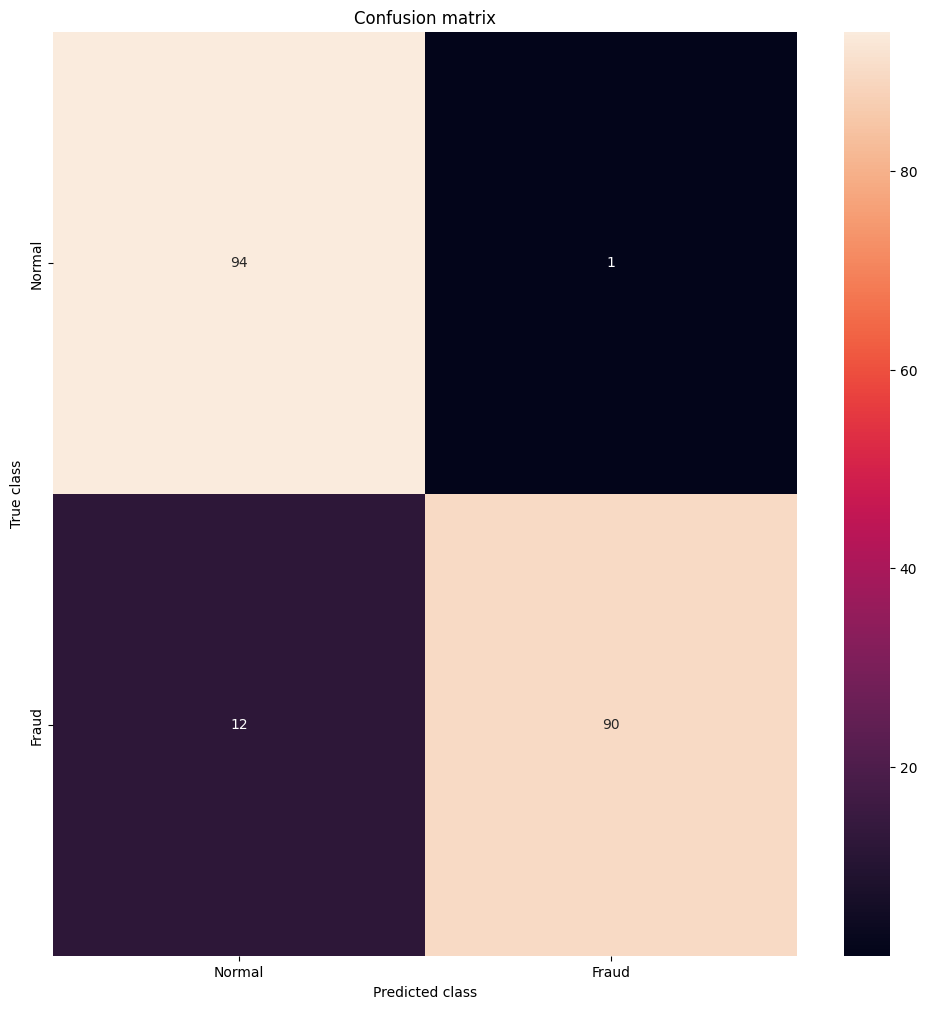

In [25]:
labels = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [26]:
cdf_train = new_cdf.copy()

In [27]:
cdf_train.sample(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
192529,129741.0,-1.396204,2.618584,-6.036770,3.552454,1.030091,-2.950358,-1.528506,0.189319,-1.433554,-5.569142,3.277546,-5.896937,-1.277102,-11.221805,0.326027,-2.497341,-1.588336,0.120289,0.170144,0.031795,0.143177,-0.390176,0.356029,-0.762352,0.096510,-0.487861,0.062655,-0.240732,1.00,1
42549,41147.0,-5.314173,4.145944,-8.532522,8.344392,-5.718008,-3.043536,-10.989185,3.404129,-6.167234,-11.435624,7.674534,-14.296091,0.526939,-15.445026,0.991651,-12.391346,-22.541652,-7.986721,2.992554,1.150017,2.331466,0.862996,-0.614453,0.523648,-0.712593,0.324638,2.245091,0.497321,88.23,1
15166,26523.0,-18.474868,11.586381,-21.402917,6.038515,-14.451158,-4.146524,-14.856124,12.431140,-4.053353,-9.040396,5.966203,-8.463966,0.078692,-9.092533,0.010822,-7.186376,-13.797475,-4.958494,1.321167,1.577924,1.741136,-1.251138,-0.396219,0.095706,1.322751,-0.217955,1.628793,0.482248,99.99,1


In [32]:
def train_random_forest(data, target):
  label_encoders = {}
  X = data.drop(target, axis=1)
  y = data[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
  rf_model = RandomForestClassifier(random_state=1,class_weight='balanced')
  rfecv_rf = RFECV(estimator=rf_model, step=1, cv=5, scoring='accuracy')
  X_train_rf_selected = rfecv_rf.fit_transform(X_train, y_train)
  print("Number of selected features:", X_train_rf_selected.shape[1])
  X_test_rf_selected = rfecv_rf.transform(X_test)
  param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
  grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train_rf_selected, y_train)
  best_rf_model = grid_search.best_estimator_
  best_params = grid_search.best_params_
  best_rf_model.fit(X_train_rf_selected, y_train)
  y_pred_rf = best_rf_model.predict(X_test_rf_selected)
  accuracy1 = accuracy_score(y_test, y_pred_rf)
  precision = precision_score(y_test, y_pred_rf)
  recall = recall_score(y_test, y_pred_rf)
  labels = ['Normal', 'Fraud']
  from sklearn.metrics import confusion_matrix
  conf_matrix = confusion_matrix(y_test, y_pred_rf)
  plt.figure(figsize =(12, 12))
  sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, fmt ="d");
  plt.title("Confusion matrix")
  plt.ylabel('True class')
  plt.xlabel('Predicted class')
  plt.show()

  return best_rf_model, best_params, accuracy1, precision, recall

Number of selected features: 26


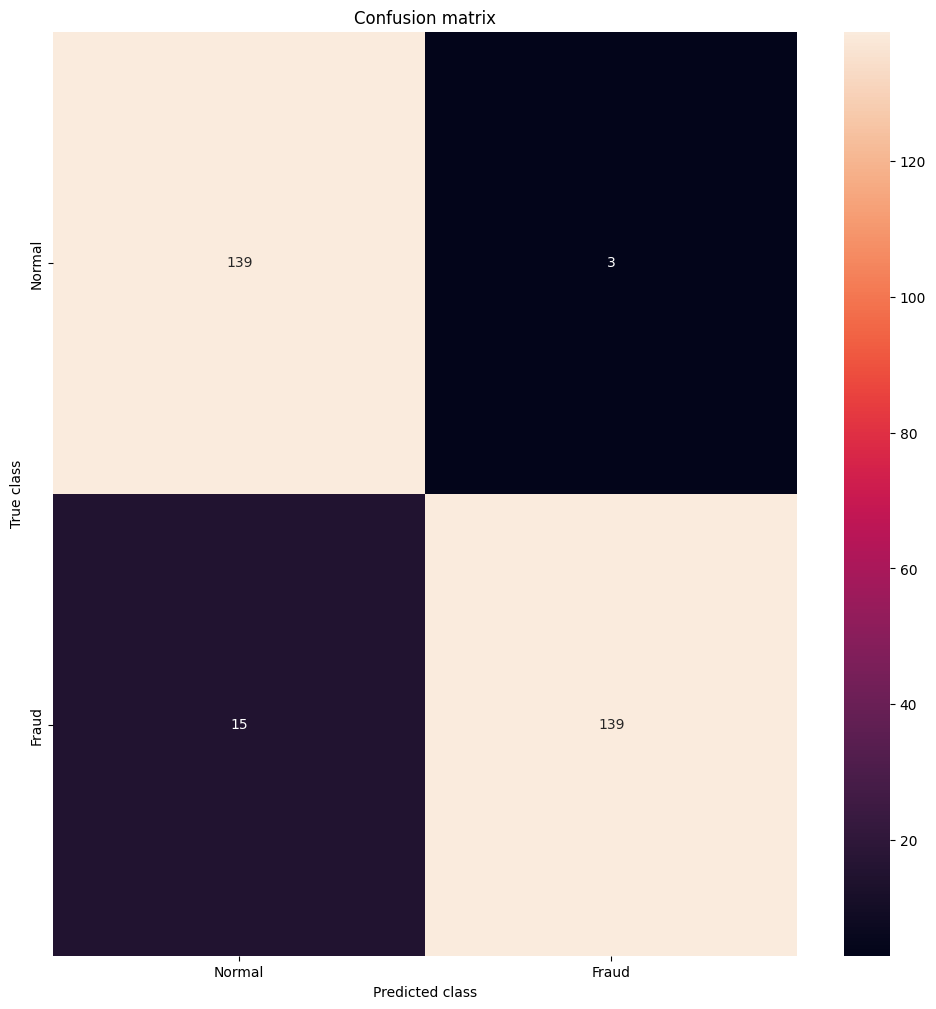

In [33]:
result1 = train_random_forest(cdf_train,'Class')


In [34]:
print(f'Best RandomForest Model: {result1[0]}')
print(f'Best Hyperparameters: {result1[1]}')
print(f'Accuracy on Test Set: {result1[2]:.2f}')
print(f'Precision on Test Set: {result1[3]:.2f}')
print(f'Recall on Test Set: {result1[4]:.2f}')

Best RandomForest Model: RandomForestClassifier(class_weight='balanced', random_state=1)
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy on Test Set: 0.94
Precision on Test Set: 0.98
Recall on Test Set: 0.90


In [38]:
def train_xgb_classifier(data, target):
  X = data.drop(target, axis=1)
  y = data[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  xgb_model = XGBClassifier(random_state=1)
  rfecv_xgb = RFECV(estimator=xgb_model, step=1, cv=5, scoring='accuracy')
  X_train_xgb_selected = rfecv_xgb.fit_transform(X_train, y_train)
  print("Number of selected features:", X_train_xgb_selected.shape[1])
  X_test_xgb_selected = rfecv_xgb.transform(X_test)
  param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 1, 2]
    }
  grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train_xgb_selected, y_train)
  best_xgb_model = grid_search.best_estimator_
  best_params = grid_search.best_params_

  print('Best Hyperparameters:')
  print(best_params)

  best_xgb_model.fit(X_train_xgb_selected, y_train)
  y_pred_xgb = best_xgb_model.predict(X_test_xgb_selected)
  accuracy2 = accuracy_score(y_test, y_pred_xgb)
  precision = precision_score(y_test, y_pred_xgb)
  recall = recall_score(y_test, y_pred_xgb)

  print(f'Accuracy on Test Set: {accuracy2:.2f}')
  print(f'Precision on Test Set: {precision:.2f}')
  print(f'Recall on Test Set: {recall:.2f}')

  labels = ['Normal', 'Fraud']
  from sklearn.metrics import confusion_matrix
  conf_matrix = confusion_matrix(y_test, y_pred_xgb)
  plt.figure(figsize =(12, 12))
  sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, fmt ="d");
  plt.title("Confusion matrix")
  plt.ylabel('True class')
  plt.xlabel('Predicted class')
  plt.show()


  return best_xgb_model, best_params, accuracy2

Number of selected features: 18
Best Hyperparameters:
{'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.8}
Accuracy on Test Set: 0.93
Precision on Test Set: 0.94
Recall on Test Set: 0.91


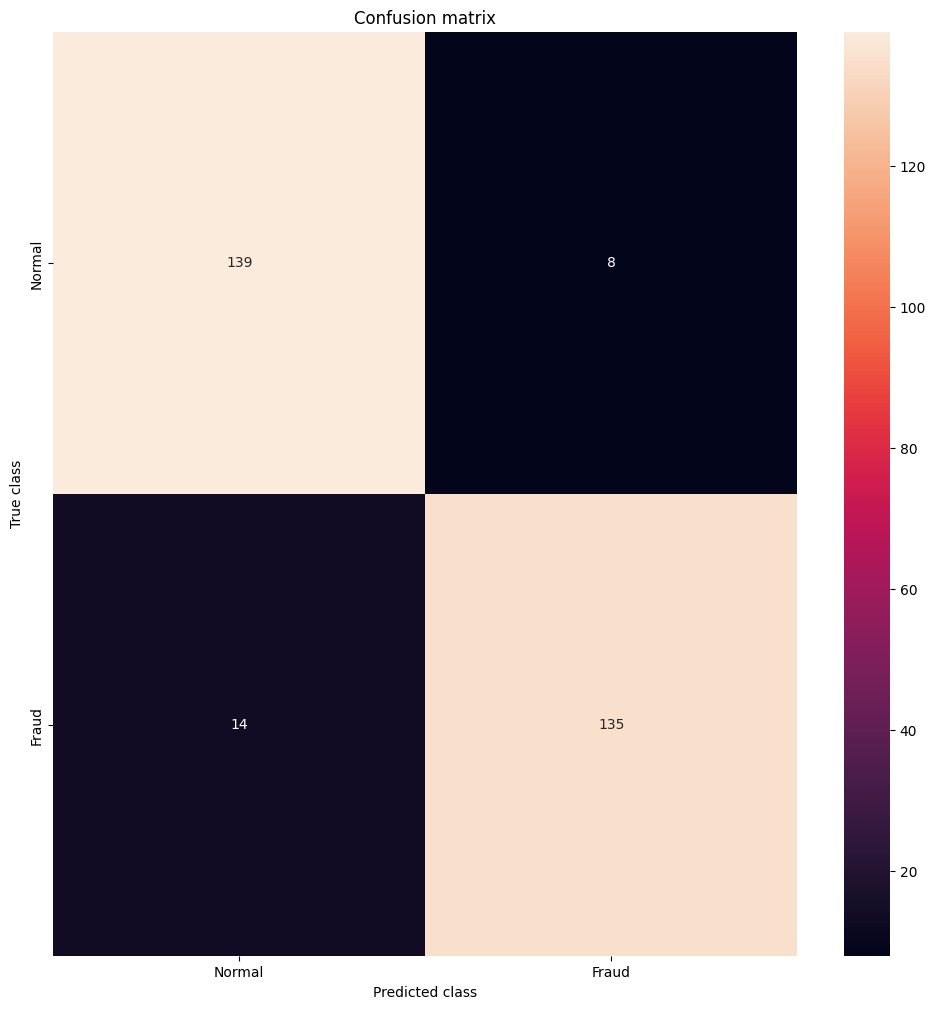

In [39]:
result2 = train_xgb_classifier(cdf_train,'Class')

Number of selected features: 1
Accuracy on Test Set: 0.91
Precision on Test Set: 0.98
Recall on Test Set: 0.83


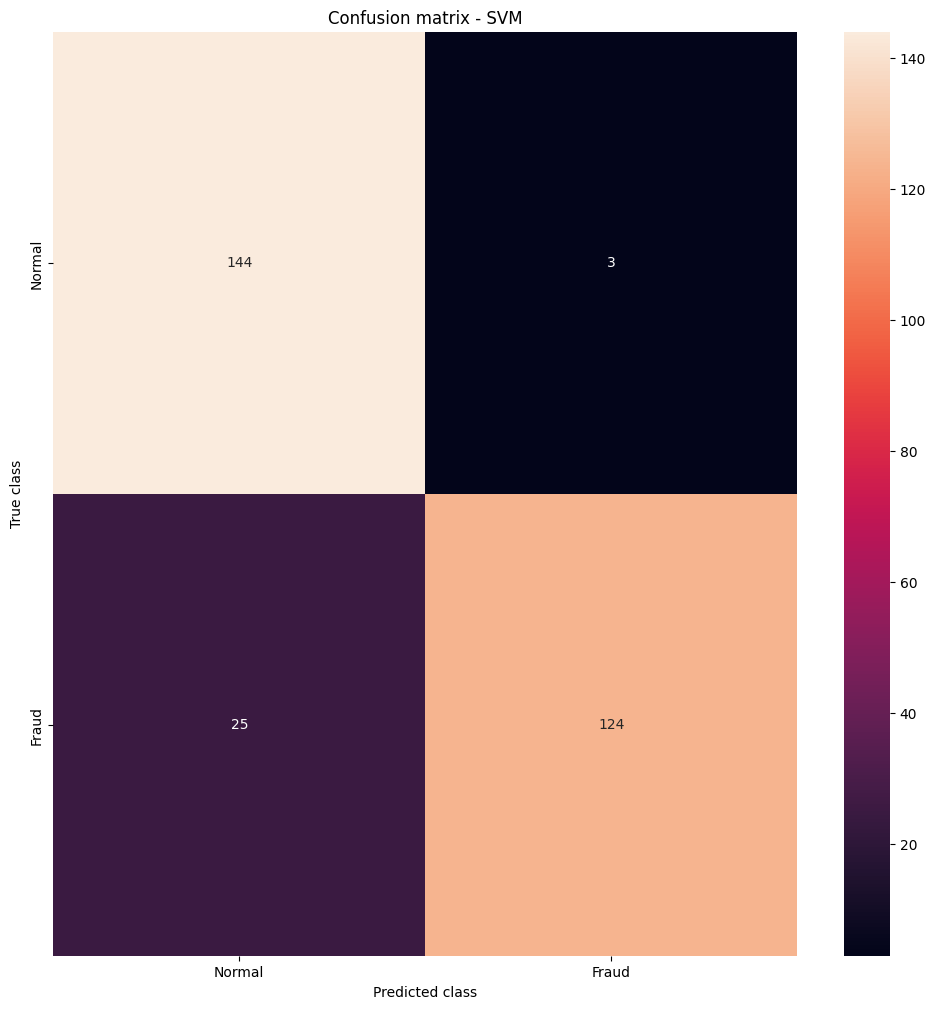

In [46]:
svm_model = LinearSVC()
X = cdf_train.drop('Class', axis=1)
y = cdf_train['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
svm_pipeline = Pipeline([('scaler', StandardScaler()), ('svm_model', svm_model)])
rfe_svm = RFE(estimator=svm_model, n_features_to_select=1)
X_train_svm_selected = rfe_svm.fit_transform(X_train, y_train)
print("Number of selected features:", X_train_svm_selected.shape[1])
X_test_svm_selected = rfe_svm.transform(X_test)
param_grid_svm = {
    'svm_model__C': [0.1, 1, 10],
}
grid_search_svm = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_svm_selected, y_train)


best_svm_model = grid_search_svm.best_estimator_
best_params_svm = grid_search_svm.best_params_

best_svm_model.fit(X_train_svm_selected, y_train)
y_pred_svm = best_svm_model.predict(X_test_svm_selected)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)

print(f'Accuracy on Test Set: {accuracy_svm:.2f}')
print(f'Precision on Test Set: {precision_svm:.2f}')
print(f'Recall on Test Set: {recall_svm:.2f}')

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix_svm, xticklabels=labels, yticklabels=labels, annot=True, fmt="d")
plt.title("Confusion matrix - SVM")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()



In [47]:
models = ['RandomForestClassifier','XGB Classifier', 'SVM']
accuracy_scores = [result1[2], result2[2], accuracy_svm]
print(result1[2])
print(result2[2])
print(accuracy_svm)
best_accuracy_index = accuracy_scores.index(max(accuracy_scores))
print(f'Best Accuracy: {accuracy_scores[best_accuracy_index]:.2f} with Model: {models[best_accuracy_index]}')


0.9391891891891891
0.9256756756756757
0.9054054054054054
Best Accuracy: 0.94 with Model: RandomForestClassifier
